# 1D TFIM: Result comparisons (10k samples)

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

The results collated below are from the inference notebooks for each case using 10000 samples during inference. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utility')
numsamples = 10000

## Inference results

In [2]:
names = ['eRNN', 'eGRU', 'hGRU', 'Exact']

N20 = [-25.0742, -25.0838, -25.0874, -25.1078]
N20v = [0.0728,0.0776,  0.0562, 0.0]
#5k samples
#N20 = [-25.0704, -25.0822, -25.0862, -25.1078]
#N20v = [0.0737, 0.0756, 0.055, 0.0]

N40 = [-50.5011, -50.5415, -50.5013, -50.5694]
N40v = [0.2226, 0.0753, 0.2324, 0.0]
#5k samples
#N40 = [-50.4843, -50.5359, -50.4971, -50.5694]
#N40v = [0.2207,  0.0754, 0.2332, 0.0]

N80=[-101.3740, -101.4131, -101.3949, -101.4974]
N80v=[0.2722, 0.1981, 0.3441, 0.0]
#5k samples
#N80=[-101.3759, -101.4087, -101.3976, -101.4974]
#N80v=[ 0.2727, 0.1849, 0.3489, 0.0]

N100=[-126.8042, -126.8717, -126.8763, -126.9619]
N100v=[0.3254, 0.1818, 0.2288, 0.0]
#5k samples
#N100=[-126.8051, -126.8759, -126.8659, -126.9619]
#N100v=[0.3312,0.1803, 0.223, 0.0]
dd = {'names': names, 'N20': N20, 'N20v': N20v,'N40': N40, 'N40v': N40v, 
      'N80': N80, 'N80v': N80v, 
      'N100': N100, 'N100v': N100v}

In [3]:
df=pd.DataFrame(dd)
df['se_20'] = df['N20v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_40'] = df['N40v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_80'] = df['N80v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_100'] = df['N100v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df.set_index('names', inplace = True)
df.drop(['N20v', 'N40v', 'N80v', 'N100v'], axis = 1, inplace = True)
df

,N20,N40,N80,N100,se_20,se_40,se_80,se_100
names,,,,,,,,
eRNN,-25.0742,-50.5011,-101.3740,-126.8042,0.003,0.005,0.005,0.006
eGRU,-25.0838,-50.5415,-101.4131,-126.8717,0.003,0.003,0.004,0.004
hGRU,-25.0874,-50.5013,-101.3949,-126.8763,0.002,0.005,0.006,0.005
Exact,-25.1078,-50.5694,-101.4974,-126.9619,0.000,0.000,0.000,0.000


In [4]:
#create a new data frame 
names_2 = ['eRNN','--', 'eGRU','--', 'hGRU','--', 'Exact','--']
def Nt(N,Nv):
    Nt = []
    for (k,j) in zip(N, Nv): 
        Nt.append(k)
        Nt.append(j)
    return Nt

dd2 = {'names': names_2, 'N20': Nt(N20,df['se_20']), 'N40': Nt(N40, df['se_40']), 
      'N80': Nt(N80, df['se_80']),'N100': Nt(N100, df['se_100'])}
df2 = pd.DataFrame(dd2)
df2.set_index('names', inplace = True)
df2

,N20,N40,N80,N100
names,,,,
eRNN,-25.0742,-50.5011,-101.3740,-126.8042
--,0.0030,0.0050,0.0050,0.0060
eGRU,-25.0838,-50.5415,-101.4131,-126.8717
--,0.0030,0.0030,0.0040,0.0040
hGRU,-25.0874,-50.5013,-101.3949,-126.8763
--,0.0020,0.0050,0.0060,0.0050
Exact,-25.1078,-50.5694,-101.4974,-126.9619
--,0.0000,0.0000,0.0000,0.0000


## Plot comparisons

In [5]:
def data_interval(data):
    data = {
       'x': data['x'],
        'y1': [y - e for y, e in zip(data['y'], data['yerr'])],
        'y2': [y + e for y, e in zip(data['y'], data['yerr'])]}
    return data

def plot_ax_errorbar(ax, df,  N, E_e, ylim, yr):
    x = np.arange(len(df.index))
    d_i = {'x': x, 'y': df[f'N{N}'], 'yerr': df[f'se_{N}']}
    ax.bar(x, df[f'N{N}'], color='lightblue')
    ax.errorbar(**d_i, fmt='o', ecolor = 'purple', capsize=4, capthick=2, label= 'VMC Energy')
    
    ax.axhline(E_e, color = 'red', label='DMRG energy')
    if ylim:
        ax.set_ylim(E_e-yr[0], E_e+yr[1])
    ax.set_xticks(range(len(x)), labels=names[:-1],rotation=90, ha="right", rotation_mode="anchor", fontsize = 14)
    ax.set_title(f'N = {N}', fontsize = 18)
    ax.set_ylabel('Mean energy', fontsize = 14)
    ax.xaxis.grid(True)
    ax.legend(loc='best')

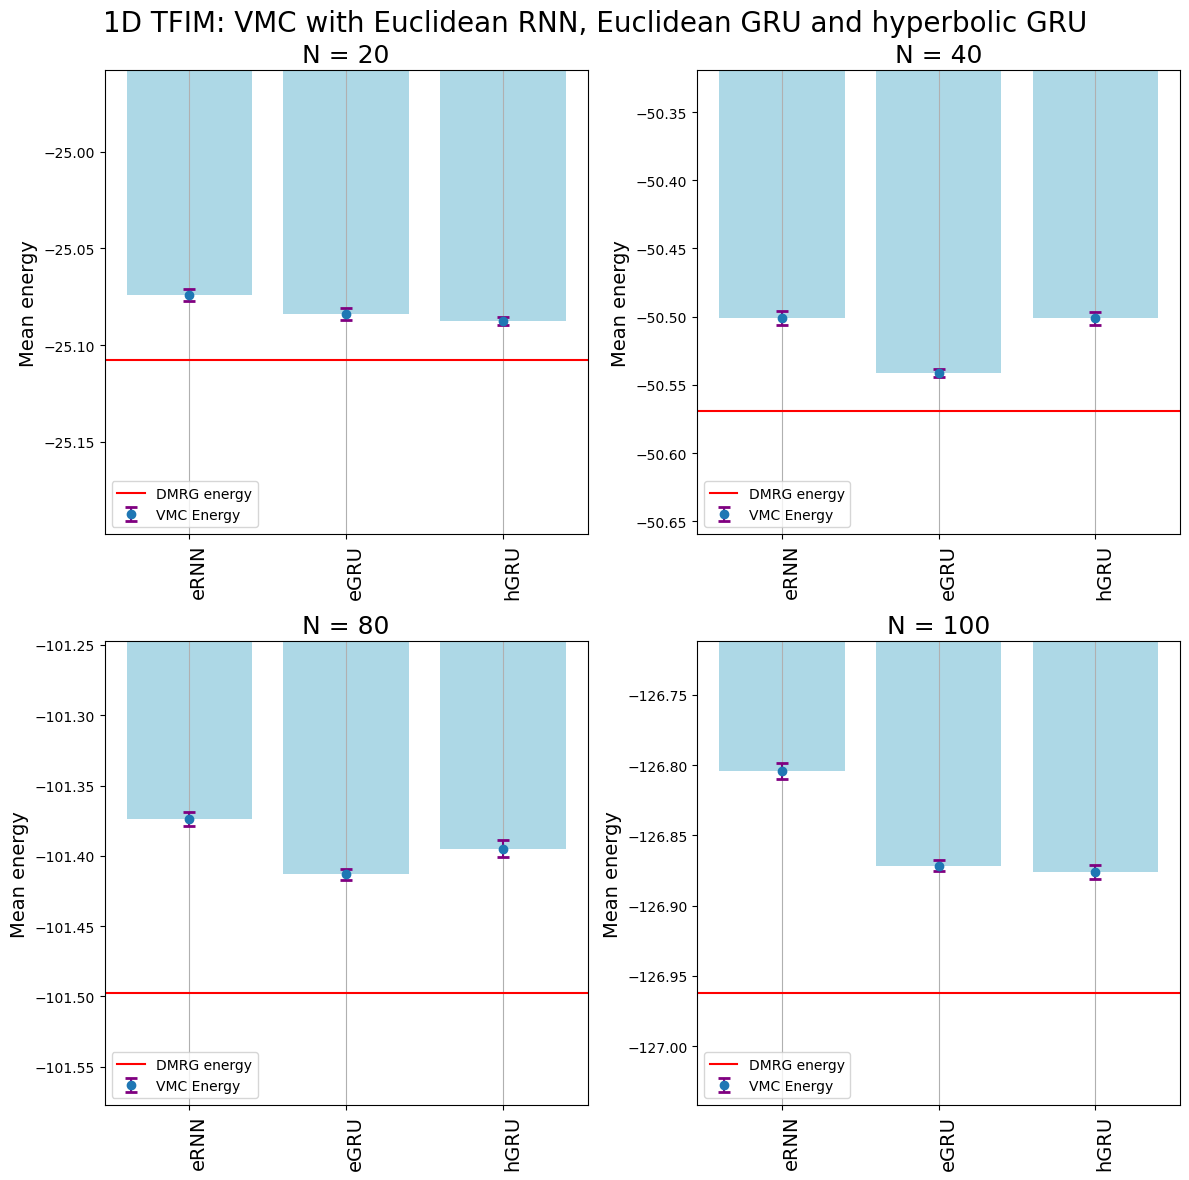

In [6]:
df = df[:3]
fig, ax = plt.subplots(2,2, figsize = (12,12), tight_layout = True)
plot_ax_errorbar(ax[0,0], df,  20, -25.1078, ylim = True, yr=[0.09, 0.15])
plot_ax_errorbar(ax[0,1], df,  40, -50.5694, ylim = True, yr=[0.09, 0.25])
plot_ax_errorbar(ax[1,0], df,  80, -101.4974, ylim = True, yr=[0.08, 0.25])
plot_ax_errorbar(ax[1,1], df, 100, -126.9619, ylim = True, yr=[0.08, 0.25])
fig.suptitle('1D TFIM: VMC with Euclidean RNN, Euclidean GRU and hyperbolic GRU', fontsize = 20)
plt.savefig('1d_tfim_comparison_10k_samples.png')